The next thing to do is to take a look at the dataset, and see what we have on our hands. Since we have it written to disk as a csv file, I can import it using pandas' read_csv function. I'm going to do a bit of plotting when I explore the dataset, so I'll go ahead and load all the packages I imagine I'll need for this.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.pylab.rcParams['figure.figsize'] = (10, 6)

Let's load the dataset as a pandas dataframe and see what it contains:

In [2]:
cd /home/soumya/research/insight/insight_project/data/

/home/soumya/research/insight/insight_project/data


In [3]:
ls

2013_consolidated_frame.csv     dsm_data_cleaned_columns.pkl
2013_test_with_dummies.pkl      dsm_data.csv
2013_train_with_dummies.pkl     dsm_data.pkl
2013_validate_with_dummies.pkl  dsm_data_scoped_variables.pkl
2013_with_dummies_.pkl          Untitled.ipynb
2013_with_dummies.pkl


In [4]:
data=pd.read_csv("./2013_consolidated_frame.csv")

First let's take a look at what features we have:

In [5]:
data.columns

Index(['DWELLING UNIT ID', ' PERSON NUMBER', ' PERSON ID (DUID + PID)',
       ' PANEL NUMBER', ' FAMILY ID (STUDENT MERGED IN) - R3/1',
       ' FAMILY ID (STUDENT MERGED IN) - R4/2',
       ' FAMILY ID (STUDENT MERGED IN) - R5/3',
       ' FAMILY ID (STUDENT MERGED IN) - 12/31/13',
       ' ANNUAL FAMILY IDENTIFIER', ' CPSFAMID', 
       ...
       ' TOTAL RX-PRV & TRI AMT 13', ' TOTAL RX-OTH COMBINED AMT 13',
       ' FINAL PERSON WEIGHT 2013', ' FINAL FAMILY WEIGHT 2013',
       ' POV ADJ FAMILY WGT-CPS FAM ON 12/31/13',
       ' FINAL SAQ PERSON WEIGHT 2013',
       ' FINAL DIABETES CARE SUPPLEMENT WEIGHT',
       ' VARIANCE ESTIMATION STRATUM - 2013',
       ' VARIANCE ESTIMATION PSU - 2013', ' '],
      dtype='object', length=1792)

The first thing I get from this is that I need to learn what these features actually are, so I'll have to look up the MEPS survey methodology or documentation in order to figure out what these features actually are. There are 1792 features for each record, so this may be a bit involved.

The second thing I get out of looking at the column names is that they really do need a bit of cleanup. For example, the first feature is called "DWELLING UNIT ID", but the second is called " PERSON NUMBER" (note the extra space at the beginning). This seems to be a running problem in the column names.

There are 1792 column names to fix, which is entirely too many to fix by hand.

On the other hand, it looks like the cleanup consists of a couple of simple rules:

    Remove the initial space in the feature name
    Pop the last entry from the column names

Let's write a function to do the first job:

In [6]:
def clean_columns(theframe):
    temp=theframe.columns.map(lambda x: (((str(x).lstrip()).rstrip()))).copy()
    theframe.columns=temp
    return theframe

Let's try this on our dataframe and see if it does the first task.

In [7]:
data1=clean_columns(data)
data1.head()

,DWELLING UNIT ID,PERSON NUMBER,PERSON ID (DUID + PID),PANEL NUMBER,FAMILY ID (STUDENT MERGED IN) - R3/1,FAMILY ID (STUDENT MERGED IN) - R4/2,FAMILY ID (STUDENT MERGED IN) - R5/3,FAMILY ID (STUDENT MERGED IN) - 12/31/13,ANNUAL FAMILY IDENTIFIER,CPSFAMID,...,TOTAL RX-PRV & TRI AMT 13,TOTAL RX-OTH COMBINED AMT 13,FINAL PERSON WEIGHT 2013,FINAL FAMILY WEIGHT 2013,POV ADJ FAMILY WGT-CPS FAM ON 12/31/13,FINAL SAQ PERSON WEIGHT 2013,FINAL DIABETES CARE SUPPLEMENT WEIGHT,VARIANCE ESTIMATION STRATUM - 2013,VARIANCE ESTIMATION PSU - 2013,
0,20004,101,20004101,17,A,A,A,A,A,A,...,0,0,6594.801768,6263.398994,6263.398994,7960.062940,0,1109,1,NaN
1,20004,102,20004102,17,A,A,A,A,A,A,...,0,0,7144.183132,6263.398994,6263.398994,7971.337575,0,1109,1,NaN
2,20004,103,20004103,17,A,A,A,A,A,A,...,77,0,5616.278666,6263.398994,6263.398994,0.000000,0,1109,1,NaN
3,20005,101,20005101,17,A,A,A,A,A,A,...,0,53,4045.586998,6080.690177,6080.690177,5604.764494,0,1109,2,NaN
4,20005,102,20005102,17,A,A,A,A,A,A,...,0,0,6901.505814,6080.690177,6080.690177,7781.609891,0,1109,2,NaN


So far so good; now I just need to get rid of the last column.

In [8]:
data1=data1.drop("",axis=1)
data1.head()

,DWELLING UNIT ID,PERSON NUMBER,PERSON ID (DUID + PID),PANEL NUMBER,FAMILY ID (STUDENT MERGED IN) - R3/1,FAMILY ID (STUDENT MERGED IN) - R4/2,FAMILY ID (STUDENT MERGED IN) - R5/3,FAMILY ID (STUDENT MERGED IN) - 12/31/13,ANNUAL FAMILY IDENTIFIER,CPSFAMID,...,TOT RX-OTH UNCLASS SRCE AMT 13,TOTAL RX-PRV & TRI AMT 13,TOTAL RX-OTH COMBINED AMT 13,FINAL PERSON WEIGHT 2013,FINAL FAMILY WEIGHT 2013,POV ADJ FAMILY WGT-CPS FAM ON 12/31/13,FINAL SAQ PERSON WEIGHT 2013,FINAL DIABETES CARE SUPPLEMENT WEIGHT,VARIANCE ESTIMATION STRATUM - 2013,VARIANCE ESTIMATION PSU - 2013
0,20004,101,20004101,17,A,A,A,A,A,A,...,0,0,0,6594.801768,6263.398994,6263.398994,7960.062940,0,1109,1
1,20004,102,20004102,17,A,A,A,A,A,A,...,0,0,0,7144.183132,6263.398994,6263.398994,7971.337575,0,1109,1
2,20004,103,20004103,17,A,A,A,A,A,A,...,0,77,0,5616.278666,6263.398994,6263.398994,0.000000,0,1109,1
3,20005,101,20005101,17,A,A,A,A,A,A,...,0,0,53,4045.586998,6080.690177,6080.690177,5604.764494,0,1109,2
4,20005,102,20005102,17,A,A,A,A,A,A,...,0,0,0,6901.505814,6080.690177,6080.690177,7781.609891,0,1109,2


Great, that worked. Alright, let's roll that into the clean_columns function:

In [9]:
def clean_columns(theframe):
    temp=theframe.columns.map(lambda x: (((str(x).lstrip()).rstrip()))).copy()
    theframe.columns=temp
    theframe=theframe.drop("",axis=1)
    return theframe

In [10]:
data=clean_columns(data)

In [11]:
data.columns

Index(['DWELLING UNIT ID', 'PERSON NUMBER', 'PERSON ID (DUID + PID)',
       'PANEL NUMBER', 'FAMILY ID (STUDENT MERGED IN) - R3/1',
       'FAMILY ID (STUDENT MERGED IN) - R4/2',
       'FAMILY ID (STUDENT MERGED IN) - R5/3',
       'FAMILY ID (STUDENT MERGED IN) - 12/31/13', 'ANNUAL FAMILY IDENTIFIER',
       'CPSFAMID', 
       ...
       'TOT RX-OTH UNCLASS SRCE AMT 13', 'TOTAL RX-PRV & TRI AMT 13',
       'TOTAL RX-OTH COMBINED AMT 13', 'FINAL PERSON WEIGHT 2013',
       'FINAL FAMILY WEIGHT 2013', 'POV ADJ FAMILY WGT-CPS FAM ON 12/31/13',
       'FINAL SAQ PERSON WEIGHT 2013', 'FINAL DIABETES CARE SUPPLEMENT WEIGHT',
       'VARIANCE ESTIMATION STRATUM - 2013', 'VARIANCE ESTIMATION PSU - 2013'],
      dtype='object', length=1791)

Perfect.

One thing worth remarking on is that I've actually extracted the variable **description** rather than the variable name in this step. This was a deliberate decision, as I find it much more intuitive to work with variable names like "MOST RECENT COLONOSCOPY (>39) - R5/3" rather than the variable name "CLNTST53". Those of you familiar with the constraints of variable names in SQL databases will object that this is going to cause trouble in the future. I decided to go with the more descriptive variable names, and write a coding-decoding function to help move data in and out of SQL databases a bit later in the project. Overall, I found this to be a reasonable choice.

To this end, let me go head and get rid of the spaces in the variables names before that causes any bugs down the road.

In [12]:
def underscore_the_headers(data):
    temp=(data.columns).copy()
    result=[term.replace(' ','_') for term in temp]
    data.columns=result.copy()
    return data

Let's run the data columns through this function:

In [13]:
data_=underscore_the_headers(data)

In [14]:
data_.columns

Index(['DWELLING_UNIT_ID', 'PERSON_NUMBER', 'PERSON_ID_(DUID_+_PID)',
       'PANEL_NUMBER', 'FAMILY_ID_(STUDENT_MERGED_IN)_-_R3/1',
       'FAMILY_ID_(STUDENT_MERGED_IN)_-_R4/2',
       'FAMILY_ID_(STUDENT_MERGED_IN)_-_R5/3',
       'FAMILY_ID_(STUDENT_MERGED_IN)_-_12/31/13', 'ANNUAL_FAMILY_IDENTIFIER',
       'CPSFAMID', 
       ...
       'TOT_RX-OTH_UNCLASS_SRCE_AMT_13', 'TOTAL_RX-PRV_&_TRI_AMT_13',
       'TOTAL_RX-OTH_COMBINED_AMT_13', 'FINAL_PERSON_WEIGHT_2013',
       'FINAL_FAMILY_WEIGHT_2013', 'POV_ADJ_FAMILY_WGT-CPS_FAM_ON_12/31/13',
       'FINAL_SAQ_PERSON_WEIGHT_2013', 'FINAL_DIABETES_CARE_SUPPLEMENT_WEIGHT',
       'VARIANCE_ESTIMATION_STRATUM_-_2013', 'VARIANCE_ESTIMATION_PSU_-_2013'],
      dtype='object', length=1791)

Great!

Next, I'd like to learn a bit more about what these features are. The main thing to keep in mind is that having a large number of features will make our model very unwieldy. 

The crucial thing for this model is for it to be as **useful** as possible, and if I have to collect 1700 features or so about a person before I can give them any useful feedback, this model won't be used by anyone.

Secondly, for the purposes of my project, I'm most concerned with how the demographic, economic, or health status of a consumer drives cost, since these are the things that can inform how we choose to design the market for healthcare services.



To this end, let's take a look at what's available at the MEPS [page](http://meps.ahrq.gov/mepsweb/data_stats/download_data_files_detail.jsp?cboPufNumber=HC-163) that points to the dataset. This page gives us two helpful pieces of information: the first is the [documentation](http://meps.ahrq.gov/mepsweb/data_stats/download_data/pufs/h163/h163doc.shtml) for the dataset  and the second is the [codebook](http://meps.ahrq.gov/mepsweb/data_stats/download_data_files_codebook.jsp?PUFId=H163), which we've already used in constructing the csv file.

While the codebook contains the entire listing of variables in the dataset and the start-end points in the ASCII file, it does not tell us what the variables actually record. To be fair, the variable names are fairly descriptive, but a quick query of one of the columns in the dataset we've constructed:



In [15]:
data["HIGH_CHOLESTEROL_DIAGNOSIS_(>17)"].describe()

count    36940.000000
mean         0.928533
std          1.355903
min         -9.000000
25%         -1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: HIGH_CHOLESTEROL_DIAGNOSIS_(>17), dtype: float64

raises the question: what do the values of this variable mean? It has a max of 2, and a min of -9. That doesn't correspond to any prior I currently have over the values of a diagnosis of high cholesterol. Let's take a more detailed look:

In [16]:
data["HIGH_CHOLESTEROL_DIAGNOSIS_(>17)"].value_counts()

 2    18967
-1    10382
 1     7497
-8       49
-7       24
-9       21
dtype: int64

The most frequently populated values are 2, 1 and -1, but there are also records with values -8, -7 and -9.

This warrants a closer look at the documentation. A quick search for "cholesterol" turns up:

    High Cholesterol

    Questions about high cholesterol were asked of persons aged 18 or older. Consequently, persons aged 17 or younger were coded as “Inapplicable” (-1) on these variables. CHOLDX ascertained whether the person had ever been diagnosed as having high cholesterol. Through 2007, a person-level variable (CHLAGE) indicated the age of diagnosis for high cholesterol on the Person-Level Use PUF. The age of diagnosis for high cholesterol (CHOLAGED) is included in this file. This variable is top-coded to 85 years of age.



which is somewhat helpful, but doesn't explain the use of the values -8 and -9.

Further digging into the documentation yields the following table:

    2.2 Reserved Codes

    The following reserved code values are used:

    Value 	Definition
    -1 INAPPLICABLE 	Question was not asked due to skip pattern
    -2 DETERMINED IN PREVIOUS ROUND 	Question was not asked in round because there was no change in current main job since previous round
    -7 REFUSED 	Question was asked and respondent refused to answer question
    -8 DK 	Question was asked and respondent did not know answer
    -9 NOT ASCERTAINED 	Interviewer did not record the data
    -10 HOURLY WAGE >= $76.96 	Hourly wage was top-coded for confidentiality
    -13 INITIAL WAGE IMPUTED 	Hourly wage was previously imputed so an updated wage is not included in this file

This is helpful; it indicates that the most relevant levels for our analysis ought to be the following three:

1. Positive diagnosis of high cholesterol
2. Negative diagnosis of high cholesterol
3. Inapplicable to respondent

and given the low population in levels below -1, we can either aggregate these data points with level==-1, or discard them entirely. In the following analysis, we choose to discard them.

A final question that needs to be asked at this step is which level corresponds to a positive diagnosis of high cholesterol? A close look at the documentation indicates that level==1 corresponds to having the condition, and level==2 corresponds to not having the condition. Knowing which level is which doesn't particularly affect the computations that generate our models going forward, but it is important for being able to interpret the models.

As a quick sanity check, let's get a visualization of the distribution of the data between these levels:

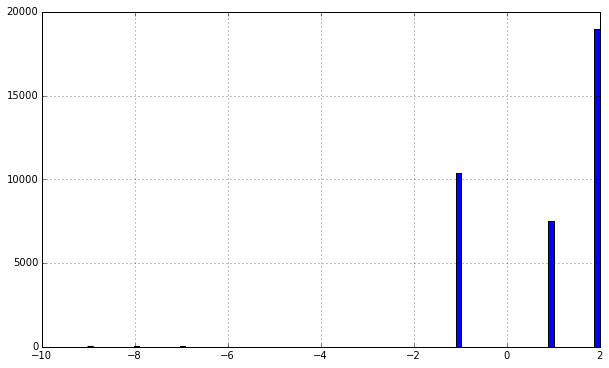

In [17]:
data["HIGH_CHOLESTEROL_DIAGNOSIS_(>17)"].hist(bins=100)

Of the respondents for whom the question was applicable, it looks like the ratio of level==1 to level==2 is 7/19 or about 1/3. This is close to the CDC estimates of the prevalence of high cholesterol amongst American adults: http://www.cdc.gov/dhdsp/data_statistics/fact_sheets/fs_cholesterol.htm .

Next, instead of using level==1 or level==2 to describe the values that a categorical feature takes, I'd like to translate the levels of these categorical variables into their descriptions so my plots are easier to read.

Here's a dictionary that implements this:

In [18]:
interpretation={}
interpretation["categorical"]={
                1: "Yes",
                2: "No",
                -1: "Inapplicable",
                -2: "Determined in previous round",
                -7: "Refused",
                -8: "Don't know",
                -9: "Not ascertained",
                -10: "HOURLY WAGE >= $76.96",
                -13: "INITIAL WAGE IMPUTED"
                }
interpretation["RACE/ETHNICITY_(EDITED/IMPUTED)"]={1: "HISPANIC",
                        2: "NON-HISPANIC WHITE ONLY",
                        3: "NON-HISPANIC BLACK ONLY",
                        4: "NON-HISPANIC ASIAN ONLY",
                        5: "NON-HISPANIC OTHER RACE OR MULTIPLE RACE"
                        }
interpretation["SEX"]={1: "MALE", 2: "FEMALE"}
interpretation["MARITAL_STATUS-12/31/13_(EDITED/IMPUTED)"]={-9: "NOT ASCERTAINED",
                           -8: "DK",
                           -7: "REFUSED",
                           1: "MARRIED",
                           2: "WIDOWED",
                           3: "DIVORCED",
                           4: "SEPARATED",
                           5: "NEVER MARRIED",
                           6: "UNDER 16 - INAPPLICABLE"
                          }
interpretation["EDUCATION_RECODE_(EDITED)"]={-9: "NOT ASCERTAINED",
                             -8: "DK",
                             -7: "REFUSED",
                             -1: "INAPPLICABLE OR UNDER 5",
                             1: "LESS THAN/EQUAL TO 8TH GRADE",
                             2: "9 - 12TH GRADE, NO HS DIPLOMA OR GED",
                             13: "GED OR HS GRAD",
                             14: "BEYOND HS,COLLEGE(NO 4YR DEG),ASSOC DEG",
                             15: "4-YEAR COLLEGE DEGREE, BACHELOR'S DEGREE",
                             16: "MASTER'S, DOCTORATE, OR PROFESSIONAL DEG"
                             }
interpretation["INDUSTRY_GROUP_RD_3/1_CMJ"]={-9: "NOT ASCERTAINED",
                            -1: "INAPPLICABLE",
                            1: "NATURAL RESOURCES",
                            2: "MINING",
                            3: "CONSTRUCTION",
                            4: "MANUFACTURING",
                            5: "WHOLESALE AND RETAIL TRADE",
                            6: "TRANSPORTATION AND UTILITIES",
                            7: "INFORMATION",
                            8: "FINANCIAL ACTIVITIES",
                            9: "PROFESSIONAL AND BUSINESS SERVICES",
                            10: "EDUCATION, HEALTH, AND SOCIAL SERVICES",
                            11: "LEISURE AND HOSPITALITY",
                            12: "OTHER SERVICES",
                            13: "PUBLIC ADMINISTRATION",
                            14: "MILITARY",
                            15: "UNCLASSIFIABLE INDUSTRY"}
interpretation["OCCUPATION_GROUP_RD_3/1_CMJ"]={-9: "NOT ASCERTAINED", -1: "INAPPLICABLE", 1: "MANAGEMENT, BUSINESS, AND FINANCIAL OPER",
                              2: "PROFESSIONAL AND RELATED OCCUPATIONS", 3: "SERVICE OCCUPATIONS", 
                              4: "SALES AND RELATED OCCUPATIONS", 5: "OFFICE AND ADMINISTRATIVE SUPPORT",
                              6: "FARMING, FISHING, AND FORESTRY", 7: "CONSTRUCTION, EXTRACTION, AND MAINTENANC",
                              8: "PRODUCTION, TRNSPORTATION, MATRL MOVING", 9: "MILITARY SPECIFIC OCCUPATIONS",
                              11: "UNCLASSIFIABLE OCCUPATION"}
interpretation["CENSUS_REGION_AS_OF_12/31/13"]={-1: "Inapplicable", 1:"Northeast", 2:"Midwest", 3:"South", 4:"West"}
interpretation["EMPLOYMENT_STATUS_RD_3/1"]={-9: "NOT ASCERTAINED",
                                            -8: "DK",
                                            -7: "REFUSED",
                                            -1: "INAPPLICABLE",
                                            1: "EMPLOYED AT RD 3/1 INT DATE",
                                            2: "JOB TO RETURN TO AT RD 3/1 INT DATE",
                                            3: "JOB DURING RD 3/1 REF PERIOD",
                                            4: "NOT EMPLOYED DURING RD 3/1"}

interpretation["FULL_YEAR_INSURANCE_COVERAGE_STATUS_2013"]={1: "<65 ANY PRIVATE",
                                                            2: "<65 PUBLIC ONLY",
                                                            3: "<65 UNINSURED",
                                                            4: "65+ EDITED MEDICARE ONLY",
                                                            5: "65+ EDITED MEDICARE AND PRIVATE",
                                                            6: "65+ EDITED MEDICARE AND OTH PUB ONLY",
                                                            7: "65+ UNINSURED",
                                                            8: "65+ NO MEDICARE AND ANY PUBLIC/PRIVATE"
                                                           }



Let's write a function that implements this as necessary for a feature:

In [19]:
def interpret(feature,level):
    if feature in interpretation:
        return interpretation[feature][level]
    elif len(data[feature].value_counts())<50:
        if level in interpretation["categorical"]:
            return interpretation["categorical"][level]
        else:
            return level
    else:
        return level

In [20]:
def interpret_new(data,feature):
    if feature in interpretation:
        return data[feature].map(lambda x: interpretation[feature][x])
    elif feature in categorical:
        return data[feature].map(lambda x: interpretation["categorical"][x])
    else:
        return data[feature]

In [21]:
thevar='HIGH_CHOLESTEROL_DIAGNOSIS_(>17)'

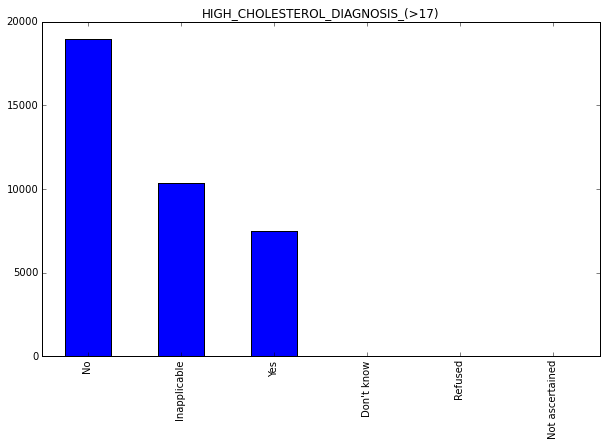

In [22]:
temp=data[thevar].map(lambda x: interpret(thevar,x))
temp.value_counts().plot(kind="bar",title=thevar)

That visualization was a nice way of learning something about the data, and confirming a hunch we had about how to interpret it. In fact, simple visual plots of different features in the dataset are a crucial way of getting some initial insight into the data, and helping us prioritize the most fruitful approaches for modeling the data.

To fix ideas, let's scope down what we want to go into our model.

Explicitly, we'd like to be able to answer the following questions: which (if any) of the following features about a person determine what they will pay for healthcare in a year?

1. Demographic information:
    1. Age
    2. Sex
    3. Race/Ethnicity
    4. Marital Status
    5. Educational attainment
    6. Census region
2. Income information (these are all top-coded in the dataset for confidentiality reasons):
3. Idiosyncratic health status variables:
    1. High blood pressure, including multiple diagnoses
    2. Heart disease (including coronary heart disease, angina, myocardial infarction, and other unspecified heart disease)
    3. Stroke
    4. Emphysema
    5. Chronic Bronchitis
    6. High cholesterol, including the age of diagnosis
    7. Cancer
    8. Diabetes
    9. Joint pain
    10. Arthritis
    11. Asthma
    12. Attention Deficit Hyperactivity Disorder/Attention Deficit Disorder (ADHD/ADD)
4. Adult Body Mass Index
5. Health Insurance Variables
    1. Public Insurance Indicators
    2. Private Insurance Indicators
    3. Any Insurance Indicators
    4. HMO plan
6. Utilization, expenditure and source of payments information

It's fair to say that this is a lot of information to process. One thing that stands out here is that there are a great number of features already recorded for us in this dataset; this is in sharp contrast to some projects I've done using text and/or social media data, in which a crucial part of the modeling process is feature construction in some appropriate way.

Since there is such a rich variety of features, I imagine most of the feature engineering in this project will amount to bucketing variables and levels in appropriate ways to optimize explained variation, rather than constructing new features from scratch.

To this end, let's make a list of the exact features we want to start working with.

1. Age as of 12/31/13 (Edited/Imputed)
2. Sex
3. Race (Edited/Imputed)
4. Marital Status–12/31/13 (Edited/Imputed)
5. Marital Status w/Spouse Present–12/31/13
6. EDUCATION RECODE (EDITED)
7. Family’s Total Income
8. High Blood Pressure Diag (>17)
9. Coronary Hrt Disease Diag (>17)
10. Age of Diagnosis-High Blood Pressure
11. Mult Diag High Blood Press (>17) 	
12. Coronary Hrt Disease Diag (>17) 	
13. Age of Diagnosis–Coronary Heart Disease 	
14. Angina Diagnosis (>17) 	
15. Age of Diagnosis-Angina 	
16. Heart Attack (MI) Diag (>17) 	
17. Age of Diagnosis-Heart Attack (MI) 	
18. Other Heart Disease Diag (>17) 	
19. Age of Diagnosis-Other Heart Disease 	
20. Stroke Diagnosis (>17) 	
21. Age of Diagnosis-Stroke 	
22. Emphysema Diagnosis (>17) 	
23. Age of Diagnosis-Emphysema 	
24. Chronc Bronchits Last 12 Mths (>17)–R3/1 	
25. Chronc Bronchits Last 12 Mths (>17)–R5/3 	
26. High Cholesterol Diagnosis (>17) 	
27. Age of Diagnosis-High Cholesterol 	
28. Cancer Diagnosis (>17) 	
29. Cancer Diagnosed - Bladder (>17)
30. Cancer Diagnosed - Breast (>17) 	
31. Cancer Diagnosed - Cervix (>17) 	
32. Cancer Diagnosed - Colon (>17) 	
33. Cancer Diagnosed - Lung (>17) 	
34. Cancer Diagnosed - Lymphoma (>17) 	
35. Cancer Diagnosed - Melanoma (>17) 	
36. Cancer Diagnosed - Other (>17) 	
37. Cancer Diagnosed - Prostate (>17) 	
38. Cancer Diagnosed – Skin-Nonmelano (>17) 	
39. Cancer Diagnosed – Skin-Unknown Type (>17) 	
40. Cancer Diagnosed - Uterus (>17) 	
41. Diabetes Diagnosis (>17) 	
42. Age of Diagnosis-Diabetes 	
43. Joint Pain Last 12 Months (>17) – RD 3/1 	
44. Joint Pain Last 12 Months (>17) – RD 5/3 	
45. Arthritis Diagnosis (>17) 	
46. Type Of Arthritis Diagnosed (>17) 	
47. Age of Diagnosis-Arthritis 	
48. Asthma Diagnosis 	
49. Age of Diagnosis-Asthma 	
50. Does Person Still Have Asthma – RD 3/1 	
51. Does Person Still Have Asthma - RD 5/3 	
52. Asthma Attack Last 12 Mos– RD 3/1 	
53. Asthma Attack Last 12 Mos– RD 5/3 	
54. When Was Last Episode Of Asthma – Rd 3/1 	
55. When Was Last Episode Of Asthma – Rd 5/3 	
56. Used Acute Pres Inhaler Last 3 Mos-RD5/3 	
57. Used >3Acute Cn Pres Inh Last 3 Mos-RD5/3 	
58. Ever Used Prev Daily Asthma Meds -RD5/3 	
59. Now Take Prev Daily Asthma Meds - RD 5/3 	
60. Have Peak Flow Meter at Home – RD 5/3 	
61. Ever Used Peak Flow Meter - RD 5/3 	
62. When Last Used Peak Flow Meter - RD 5/3 	
63. ADHD/ADD Diagnosis (5-17) 	
64. Age of Diagnosis-ADHD/ADD
65. Pregnant During Ref Period – RD 3/1 	
66. Limitation in Physical Functioning – RD 3/1
67. Employment Status RD 3/1
68. Has More than One Job RD 3/1 Int Date
69. Self-Employed at RD 3/1 CMJ
70. Choice of Health Plans at RD 3/1 CMJ
71. Industry Group RD 3/1 CMJ
72. Union Status at RD 3/1 CMJ
73. Occupation Group RD 3/1 CMJ
74. Health Insur Held from RD 3/1 CMJ (Ed)
75. Health Insur Offered by RD 3/1 CMJ (Ed)
76. Employer Offers Health Ins RD 3/1 CMJ
77. Full Year Insurance Coverage Status 2013
78. Anyone in RU Have FSA
79. \# Wks/Mon Wout Hlth Ins Prv Yr–Pnl 18 Onl
80. Private Insurance Any Time in R5/R3
81. Public Ins Any Time in R5/R3
82. Insured Any Time in R3/1
83. Any Time Coverage by State Ins - R3/1
84. \# Office-Based Provider Visits 2013
85. \# Outpatient Dept Provider Visits 2013
87. \# Emergency Room Visits 2013
89. \# Nights in Hosp for Discharges 2013
92. Final Person Weight, 2013
93. Census Region as of 12/31/13



It's going to be extremely interesting to see if these have explanatory power for the statistical variation in spending on healthcare!

Speaking of which, what are the variables we're trying to predict?

1. TOTAL OFFICE-BASED EXP 13
2. TOTAL OUTPATIENT PROVIDER EXP 13
3. TOT HOSP IP FACILITY + DR EXP 13
4. TOTAL ER FACILITY + DR EXP 13

The dataset breaks out healthcare expenses into these four location based categories: office, outpatient, inpatient and ER.

Another modeling choice that needs to be made is whether to try and predict total expenses, or predict each category of expense individually. In my Insight project, I opted to try and predict them individually, to see if I could shed some light on whether the service location affected prices charged. There's substantial reason to think this may be the case: ER sticker shock is widely reported in the news, more so than office visits.

Finally, it's time to reflect a bit on what we've done here. We've isolated explanatory variables that we hope and expect should be predictive of how much a person is charged for healthcare services in four different categories. That's great, but there's a very large number of predictors: over 80. Since the ultimate goal is to build a usable interface to the model that people can use to get a sense of their expected outlays on healthcare, it makes sense to refine and reduce this list. But how?

One way to think about this is to consider what information people are comfortable and likely to share about themselves that could help to predict expenses. Another is to focus on what the most predictive variables are, and then ask users to populate these variables in order to get a prediction. 

In my Insight project, I opted to balance both these concerns by ranking the explanatory variables in terms of statistical variance explained, cutting off at a reasonable threshold (somewhere in between 10 and 20 variables, corresponding to 10-20 questions asked of the user), and also culling variables that would be particularly burdensome to the user to have to report.

The next thing to think about is: now that we have explanatory variables and explained variables selected, how do we best go about building a model?

One thing to do is to examine the data feature by feature, to get a better sense of what it looks like and to pick up hunches for what may explain the variation.



First, let's look at the explained variables:

In [23]:
data["TOTAL_OFFICE-BASED_EXP_13"].describe()

count     36940.000000
mean        884.442799
std        3290.683088
min           0.000000
25%           0.000000
50%         156.000000
75%         653.000000
max      195295.000000
Name: TOTAL_OFFICE-BASED_EXP_13, dtype: float64

This is interesting. It looks like upto half of respondents (and by scaling out using the person weights, half of all Americans) spend less than $200 for office-based services in a year. The maximum though, is concerning: over a hundred thousand dollars? Let's take a closer look at that.

In [24]:
data[data["TOTAL_OFFICE-BASED_EXP_13"]>=100000]

,DWELLING_UNIT_ID,PERSON_NUMBER,PERSON_ID_(DUID_+_PID),PANEL_NUMBER,FAMILY_ID_(STUDENT_MERGED_IN)_-_R3/1,FAMILY_ID_(STUDENT_MERGED_IN)_-_R4/2,FAMILY_ID_(STUDENT_MERGED_IN)_-_R5/3,FAMILY_ID_(STUDENT_MERGED_IN)_-_12/31/13,ANNUAL_FAMILY_IDENTIFIER,CPSFAMID,...,TOT_RX-OTH_UNCLASS_SRCE_AMT_13,TOTAL_RX-PRV_&_TRI_AMT_13,TOTAL_RX-OTH_COMBINED_AMT_13,FINAL_PERSON_WEIGHT_2013,FINAL_FAMILY_WEIGHT_2013,POV_ADJ_FAMILY_WGT-CPS_FAM_ON_12/31/13,FINAL_SAQ_PERSON_WEIGHT_2013,FINAL_DIABETES_CARE_SUPPLEMENT_WEIGHT,VARIANCE_ESTIMATION_STRATUM_-_2013,VARIANCE_ESTIMATION_PSU_-_2013
2384,21174,101,21174101,17,A,A,A,A,A,A,...,0,0,0,10189.789734,8764.276613,8764.276613,11832.982213,13517.344724,1007,1
2834,21386,102,21386102,17,A,A,A,A,A,A,...,0,16487,0,22234.388648,26645.022692,26645.022692,24377.214141,26657.263092,1065,1
15019,27647,105,27647105,17,A,A,A,A,A,A,...,0,173,0,16134.188642,6000.045922,6000.045922,0.000000,0.000000,1149,2
15659,27976,101,27976101,17,A,A,A,A,A,A,...,0,0,0,15650.765936,12480.521290,12480.521290,14907.860615,16293.073976,1140,1


There are 4 people with office based expenses of over 100k. I'd like to take a look to see if these records are bad data, or if they should be kept in the dataset. My prior is that they should be kept in the dataset (the MEPS survey has been running for over 15 years by people who I can only assume know what they're doing). But it doesn't hurt to take a closer look.

I don't want to look at all the extra features in the dataset beyond those that I've decided I care about, so let's go about trimming the dataframe down to contain just these features.

As a matter of good practice, let's write the current dataset to a file, in case we break something and need to come back to this checkpoint.

In [25]:
data.to_pickle("/home/soumya/research/insight/insight_project/modeling/data/dsm_data_cleaned_columns.pkl")

I've manually written the explanatory variables to a text file located at "/home/soumya/research/insight/insight\_project/modeling/code/dsm\_exog\_.txt". I'm going to read this into memory:

In [26]:
variables=[]
with open("/home/soumya/research/insight/insight_project/modeling/code/dsm_exog_.txt","r") as f:
    lines=f.readlines()
    for line in lines:
        variables.append(line.strip().upper())
print(variables)

['AGE_AS_OF_12/31/13_(EDITED/IMPUTED)', 'SEX', 'RACE/ETHNICITY_(EDITED/IMPUTED)', 'MARITAL_STATUS-12/31/13_(EDITED/IMPUTED)', "FAMILY'S_TOTAL_INCOME", 'ADULT_BODY_MASS_INDEX_(>17)_-_RD_5/3', 'HIGH_BLOOD_PRESSURE_DIAG_(>17)', 'CORONARY_HRT_DISEASE_DIAG_(>17)', 'AGE_OF_DIAGNOSIS-HIGH_BLOOD_PRESSURE', 'MULT_DIAG_HIGH_BLOOD_PRESS_(>17)', 'AGE_OF_DIAGNOSIS-CORONARY_HEART_DISEASE', 'ANGINA_DIAGNOSIS_(>17)', 'AGE_OF_DIAGNOSIS-ANGINA', 'HEART_ATTACK_(MI)_DIAG_(>17)', 'AGE_OF_DIAGNOSIS-HEART_ATTACK(MI)', 'OTHER_HEART_DISEASE_DIAG_(>17)', 'AGE_OF_DIAGNOSIS-OTHER_HEART_DISEASE', 'STROKE_DIAGNOSIS_(>17)', 'AGE_OF_DIAGNOSIS-STROKE', 'EMPHYSEMA_DIAGNOSIS_(>17)', 'AGE_OF_DIAGNOSIS-EMPHYSEMA', 'CHRONC_BRONCHITS_LAST_12_MTHS_(>17)-R3/1', 'CHRONC_BRONCHITS_LAST_12_MTHS_(>17)-R5/3', 'HIGH_CHOLESTEROL_DIAGNOSIS_(>17)', 'AGE_OF_DIAGNOSIS-HIGH_CHOLESTEROL', 'CANCER_DIAGNOSIS_(>17)', 'CANCER_DIAGNOSED_-_BLADDER_(>17)', 'CANCER_DIAGNOSED_-_BREAST_(>17)', 'CANCER_DIAGNOSED_-_CERVIX_(>17)', 'CANCER_DIAGNOSED_-_

I'm going to make sure there are no duplicates in my list:

In [27]:
print("There were %d variables to start."%len(variables))
temp=[]
while variables!=[]:
    this=variables.pop()
    if this in temp:
        continue
    else:
        temp.append(this)
while temp!=[]:
    variables.append(temp.pop())
print("There were %d variables at the end."%len(variables))

There were 87 variables to start.
There were 87 variables at the end.


For future reference, let's write this dataset to disk so we don't have to do all this over again.

In [28]:
data[variables].to_pickle("/home/soumya/research/insight/insight_project/modeling/data/dsm_data_scoped_variables.pkl")

Let's check this worked:

In [29]:
data=pd.read_pickle("/home/soumya/research/insight/insight_project/modeling/data/dsm_data_scoped_variables.pkl")

In [30]:
data.head()

,AGE_AS_OF_12/31/13_(EDITED/IMPUTED),SEX,RACE/ETHNICITY_(EDITED/IMPUTED),MARITAL_STATUS-12/31/13_(EDITED/IMPUTED),FAMILY'S_TOTAL_INCOME,ADULT_BODY_MASS_INDEX_(>17)_-_RD_5/3,HIGH_BLOOD_PRESSURE_DIAG_(>17),CORONARY_HRT_DISEASE_DIAG_(>17),AGE_OF_DIAGNOSIS-HIGH_BLOOD_PRESSURE,MULT_DIAG_HIGH_BLOOD_PRESS_(>17),...,#_OUTPATIENT_DEPT_PROVIDER_VISITS_13,#_EMERGENCY_ROOM_VISITS_13,#_NIGHTS_IN_HOSP_FOR_DISCHARGES_2013,FINAL_PERSON_WEIGHT_2013,TOTAL_OFFICE-BASED_EXP_13,TOTAL_OUTPATIENT_PROVIDER_EXP_13,TOT_HOSP_IP_FACILITY_+_DR_EXP_13,TOTAL_ER_FACILITY_+_DR_EXP_13,CENSUS_REGION_AS_OF_12/31/13,EDUCATION_RECODE_(EDITED)
0,39,1,1,1,85728,35.5,2,2,-1,-1,...,0,0,0,6594.801768,428,0,0,0,3,14
1,40,2,1,1,85728,28.5,2,2,-1,-1,...,0,0,0,7144.183132,0,0,0,0,3,13
2,10,2,1,6,85728,-1.0,-1,-1,-1,-1,...,2,0,0,5616.278666,0,108,0,0,3,1
3,52,1,1,4,20142,26.6,1,2,41,2,...,0,0,0,4045.586998,674,0,0,0,1,14
4,22,1,1,5,20142,22.9,2,2,-1,-1,...,0,0,0,6901.505814,0,0,0,0,1,14


Great! Now let's look at those four data points more closely. **N.B: Note the change of assignment to the name "data".**

In [31]:
data[["#_OFFICE-BASED_PROVIDER_VISITS_13","TOTAL_OFFICE-BASED_EXP_13"]][data["TOTAL_OFFICE-BASED_EXP_13"]>=100000]

,#_OFFICE-BASED_PROVIDER_VISITS_13,TOTAL_OFFICE-BASED_EXP_13
2384,168,109403
2834,164,195295
15019,51,137891
15659,128,183384


Ok, if you look at the feature called "# OFFICE-BASED PROVIDER VISITS 13", it looks like these people had 168, 164, 51 and 128 visits each. While this certainly seems anomalous, it's consistent with the high values for amounts billed for office-based expenses.

At this point it's unclear whether these points should be left in the dataset, or thrown out. On the one hand, one would hope that most people don't need over 160 visits to an office-based provider in a year. On the other hand, it's a well-documented fact that a small handful of very ill people account for the vast majority of healthcare costs in the U.S. every year (this is well known to third-party payors).

I'd like to take a closer look at this feature before I make a final decision as to whether to leave it in or not.

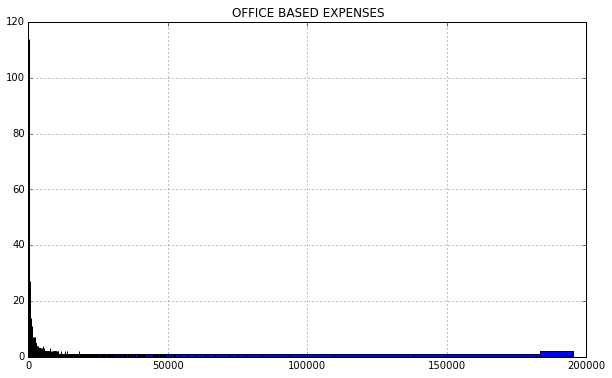

In [32]:
bins=sorted(data["TOTAL_OFFICE-BASED_EXP_13"][data["TOTAL_OFFICE-BASED_EXP_13"]>0].unique())
ax=data["TOTAL_OFFICE-BASED_EXP_13"][data["TOTAL_OFFICE-BASED_EXP_13"]>0].hist(bins=bins)
ax.set_title("OFFICE BASED EXPENSES")
plt.show()

The graph above is a line plot of billed charges vs index in the dataframe. It looks like the outliers are certainly anomalous, but not so much that I want to discard them. For reference, there seems to be quite a lot of mass in the 50k-150k range, and that seems plausible to me in light of the fact that the sickest patients cost disproportionately more to treat.

Let's look at the other explained variables:

In [33]:
data["TOTAL_OUTPATIENT_PROVIDER_EXP_13"].describe()

count    36940.000000
mean        45.211722
std        385.887201
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      26703.000000
Name: TOTAL_OUTPATIENT_PROVIDER_EXP_13, dtype: float64

There seems to be even more skew in outpatient expenses: more than 75% of people spend nothing, yet the maximum spent is over 25k.

Let's look at some plots:

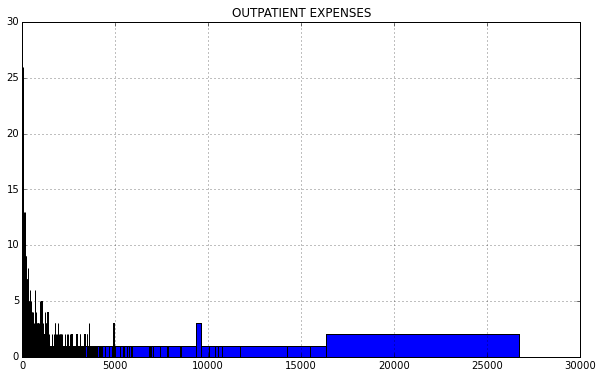

In [34]:
bins=sorted(data["TOTAL_OUTPATIENT_PROVIDER_EXP_13"][data["TOTAL_OUTPATIENT_PROVIDER_EXP_13"]>0].unique())
ax=data["TOTAL_OUTPATIENT_PROVIDER_EXP_13"][data["TOTAL_OUTPATIENT_PROVIDER_EXP_13"]>0].hist(bins=bins)
ax.set_title("OUTPATIENT EXPENSES")
plt.show()

That's more helpful. It agains looks like there's little reason to discard the outliers.

As an interesting visualization of how few people actually have expenses for outpatient services, let's run the same plot but without restricting to those that have positive expenses:

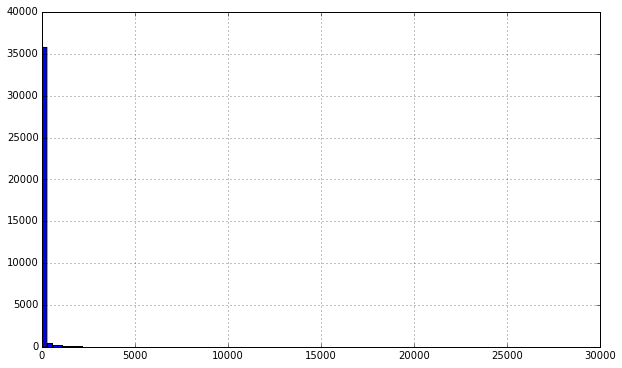

In [35]:
data["TOTAL_OUTPATIENT_PROVIDER_EXP_13"].hist(bins=100)

The vast majority of people are at 0, and I can barely see the rest of the histogram.

This level of zero-clustering looks like it will be important to account for in the modeling process. Since positive expenses in this category are rare, the cost functions that we optimize to deduce the correct model parameters will be very strongly influenced by the fact that most of the data points lie at 0. It may be necessary to upsample in some way, or equivalently penalize the data points at 0 in order to generate a helpful model, and the penalization will probably be subject to tuning at the end of all of this.

The last two response variables are for inpatient expenses and ER expenses:


In [36]:
data["TOT_HOSP_IP_FACILITY_+_DR_EXP_13"].describe()

count     36940.000000
mean        977.643097
std        7413.503502
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      320929.000000
Name: TOT_HOSP_IP_FACILITY_+_DR_EXP_13, dtype: float64

In [37]:
data["TOTAL_ER_FACILITY_+_DR_EXP_13"].describe()

count    36940.000000
mean       176.546833
std       1029.557499
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      63179.000000
Name: TOTAL_ER_FACILITY_+_DR_EXP_13, dtype: float64

Similar skew for both.

In [38]:
data["TOT_HOSP_IP_FACILITY_+_DR_EXP_13"][data["TOT_HOSP_IP_FACILITY_+_DR_EXP_13"]>0].describe()

count      2220.000000
mean      16267.628829
std       25808.111520
min           3.000000
25%        4225.750000
50%        8584.500000
75%       17470.250000
max      320929.000000
Name: TOT_HOSP_IP_FACILITY_+_DR_EXP_13, dtype: float64

In [39]:
data["TOTAL_ER_FACILITY_+_DR_EXP_13"][data["TOTAL_ER_FACILITY_+_DR_EXP_13"]>0].describe()

count     4922.000000
mean      1324.997968
std       2536.670125
min          3.000000
25%        248.000000
50%        590.500000
75%       1363.750000
max      63179.000000
Name: TOTAL_ER_FACILITY_+_DR_EXP_13, dtype: float64

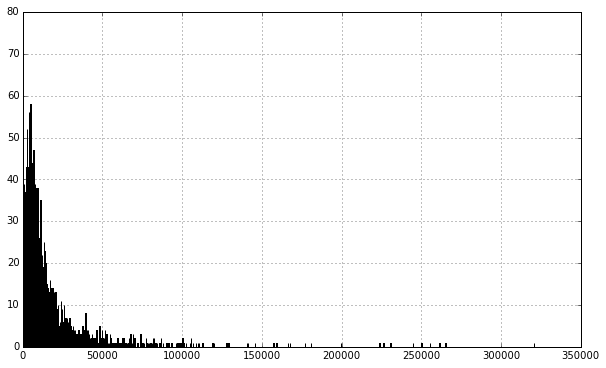

In [40]:
data["TOT_HOSP_IP_FACILITY_+_DR_EXP_13"][data["TOT_HOSP_IP_FACILITY_+_DR_EXP_13"]>0].hist(bins=1000)

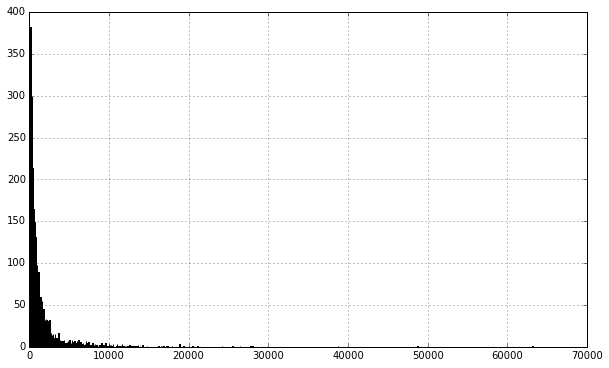

In [41]:
data["TOTAL_ER_FACILITY_+_DR_EXP_13"][data["TOTAL_ER_FACILITY_+_DR_EXP_13"]>0].hist(bins=1000)

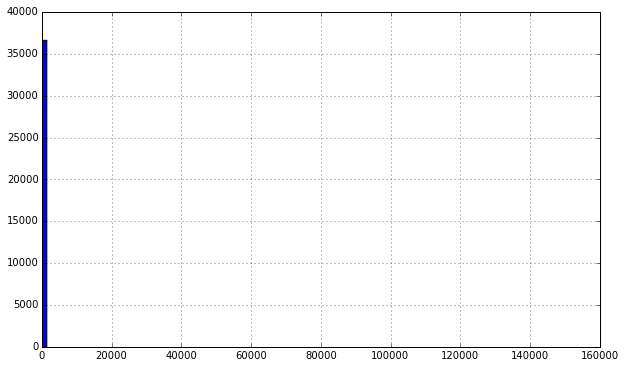

In [42]:
data["TOT_HOSP_IP_FACILITY_+_DR_EXP_13"][data["TOT_HOSP_IP_FACILITY_+_DR_EXP_13"]].hist(bins=100)

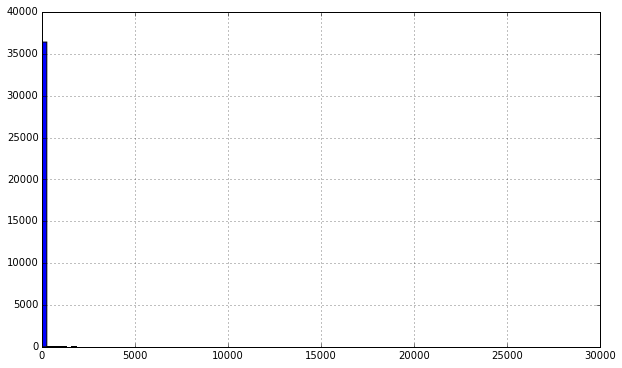

In [43]:
data["TOTAL_ER_FACILITY_+_DR_EXP_13"][data["TOTAL_ER_FACILITY_+_DR_EXP_13"]].hist(bins=100)

Once again, the skew (or zero clustering) for these categories is very pronounced.

Now that we've looked at plots for the response variables, let's take a look at the distributions for the explanatory variables.

There are a lot of these, so I'll devote a blog post to looking at these separately and in a systematic way.